In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

db_filename = 'dinofunworld-2.db'
conn = sqlite3.connect('dinofunworld-2.db')
c = conn.cursor()

c.execute("select visitorid, sequence from sequences where visitorid in (165316, 1835254, 296394, 404385, 448990);")
visSeq = c.fetchall()
seqFrame = pd.DataFrame.from_records(visSeq, columns=['visitorID', 'sequence'])
seqFrame['sequence'] = seqFrame['sequence'].apply(lambda v: [i for i in v.split("-")])
dicti = {}
dictii = {}
dictiii = {}
dictiv = {}
dictv = {}
dicto = {}
for i in range(0, 1):
    for j in range(0, 5):
        if (i != j):
            count = sum(1 for a, b in zip(seqFrame['sequence'][i], seqFrame['sequence'][j]) if a != b)
            dicti[seqFrame['visitorID'][j]] = count
    dicto[seqFrame['visitorID'][i]] = dicti
    
for i in range(1, 2):
    for j in range(0, 5):
        if (i != j):
            count = sum(1 for a, b in zip(seqFrame['sequence'][i], seqFrame['sequence'][j]) if a != b)
            dictii[seqFrame['visitorID'][j]] = count
    dicto[seqFrame['visitorID'][i]] = dictii
    
for i in range(2, 3):
    for j in range(0, 5):
        if (i != j):
            count = sum(1 for a, b in zip(seqFrame['sequence'][i], seqFrame['sequence'][j]) if a != b)
            dictiii[seqFrame['visitorID'][j]] = count
    dicto[seqFrame['visitorID'][i]] = dictiii
    
for i in range(3, 4):
    for j in range(0, 5):
        if (i != j):
            count = sum(1 for a, b in zip(seqFrame['sequence'][i], seqFrame['sequence'][j]) if a != b)
            dictiv[seqFrame['visitorID'][j]] = count
    dicto[seqFrame['visitorID'][i]] = dictiv
    
for i in range(4, 5):
    for j in range(0, 5):
        if (i != j):
            count = sum(1 for a, b in zip(seqFrame['sequence'][i], seqFrame['sequence'][j]) if a != b)
            dictv[seqFrame['visitorID'][j]] = count
    dicto[seqFrame['visitorID'][i]] = dictv
    
print(dicto)

{165316: {296394: 318, 404385: 329, 448990: 318, 1835254: 336}, 296394: {165316: 318, 404385: 303, 448990: 0, 1835254: 282}, 404385: {165316: 329, 296394: 303, 448990: 303, 1835254: 298}, 448990: {165316: 318, 296394: 0, 404385: 303, 1835254: 282}, 1835254: {165316: 336, 296394: 282, 404385: 298, 448990: 282}}


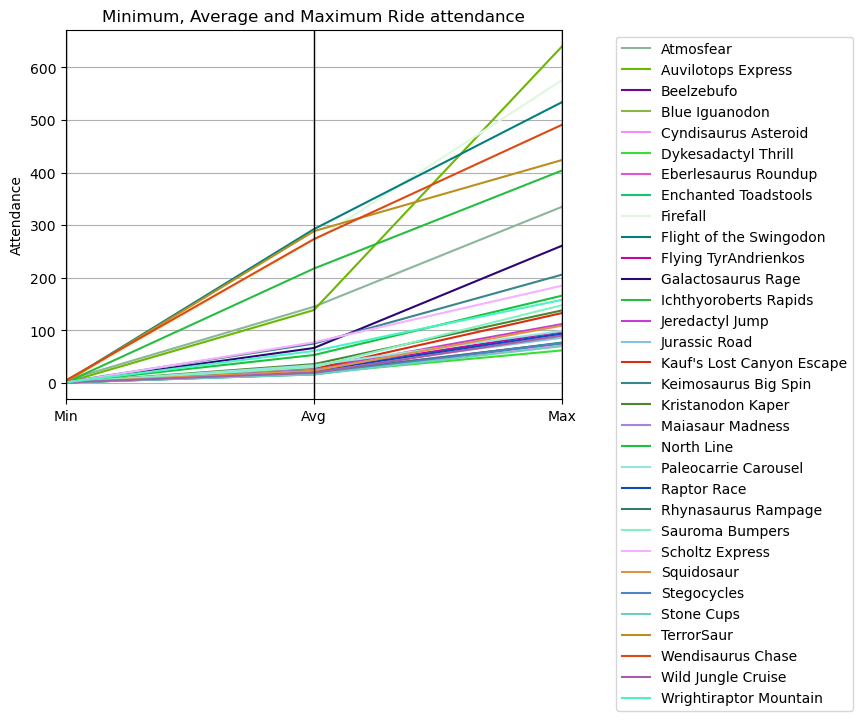

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

db_filename = 'dinofunworld-2.db'
conn = sqlite3.connect('dinofunworld-2.db')
c = conn.cursor()

c.execute("select attractionid, name from attraction where category LIKE '%rides%' order by name ASC;")
rides = c.fetchall()
#print(len(rides))
c.execute("select visitorid, sequence from sequences;")
sequences = c.fetchall()
seqFrame = pd.DataFrame.from_records(sequences, columns=['visitorID', 'sequence'])
seqFrame['sequence'] = seqFrame['sequence'].apply(lambda v: [i for i in v.split("-")])
firstEle = [i[0] for i in rides]
secEle = [i[1] for i in rides]
finList = []

for i in range(len(firstEle)):
    try:
        seqFrame['sequenceNew'] = seqFrame['sequence'].apply(lambda v: [1 if j == str(firstEle[i]) else 0 for j in v])
        visitorCnt = np.sum(seqFrame['sequenceNew'].values.tolist(), axis=0)
        visitorCnt = visitorCnt[np.nonzero(visitorCnt)]
        minCnt = np.min(visitorCnt)
        maxCnt = np.max(visitorCnt)
        avgCnt = np.mean(visitorCnt)
        finList.append([secEle[i], minCnt, avgCnt, maxCnt])
    except:
        continue
        
df = pd.DataFrame(finList, columns = ['Name', 'Min', 'Avg', 'Max'])
pd.plotting.parallel_coordinates(df, 'Name')
plt.gca().legend(bbox_to_anchor= (1.6, 1), loc='upper right')
plt.title('Minimum, Average and Maximum Ride attendance')
plt.ylabel('Attendance')
plt.show()

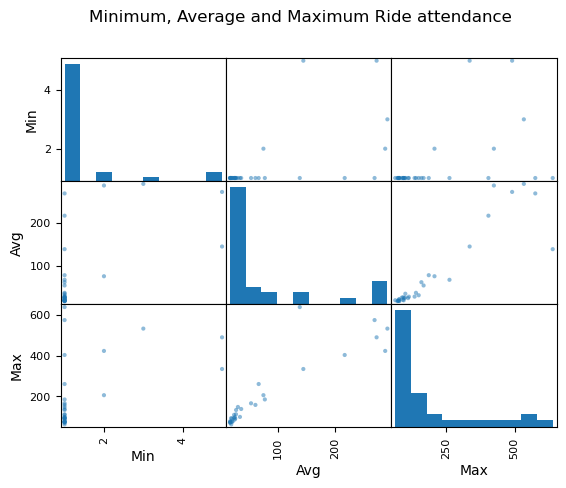

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

db_filename = 'dinofunworld-2.db'
conn = sqlite3.connect('dinofunworld-2.db')
c = conn.cursor()

# Graded Cell, PartID: KHoww
# Create and display a Scatterplot Matrix displaying the minimum, average, and 
# maximum attendance for each ride in the park.
# Note: This is a different view into the same data as the previous part. While
# you work on these plots, consider the different things that each chart says
# about the data.
pd.plotting.scatter_matrix(df)
plt.suptitle('Minimum, Average and Maximum Ride attendance')
plt.show()